# Project: SQL Queries

**Client:**

The company is the owner of a large subscription-based book reading service.

**Objective:** To analyze the database in order to formulate a value proposition for a new product.

**Results of Data Analysis:**

As a result of the database analysis, several key aspects have been identified that can be utilized to formulate a value proposition for a new subscription-based book reading service product:

- Diversity of Contemporary Book Collection: The database contains information on one thousand books from 636 authors. This allows offering users a considerable selection of literature that matches their interests and preferences.

- Content Quality: The presence of ratings and reviews enables an assessment of the book quality within the database. Utilizing this information, the most popular and highly-rated books can be highlighted.

- User-Friendly Experience: Information on the number of pages (on average - 389 pages), publication dates, and book publishers facilitates the creation of a convenient interface, assisting users in quickly finding books.

- Authorship: Details about book authors provide an opportunity to emphasize the uniqueness and exclusivity of the content, such as featuring books by renowned authors.

- Based on these aspects, the company can formulate its value proposition, distinguishing its service in the market and attracting more users.

## Data Schema

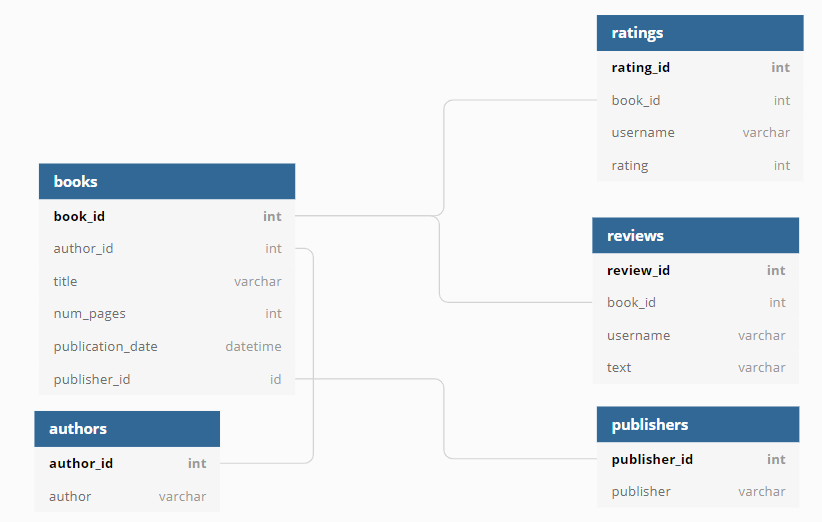

In [1]:
# library import
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
db_config = {
    'user': 'praktikum_student',  # username
    'pwd': 'Sdf4$2;d-d30pp',  # password
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,  # connection port
    'db': 'data-analyst-final-project-db'  # database name
}

connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# Saving the Connector
engine = create_engine(connection_string, connect_args={'sslmode': 'require'})

# List of Tables
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']

# Extracting data from each table
for table in tables:
    query = '''SELECT * FROM {} LIMIT 5'''.format(table)
    con = engine.connect()
    df = pd.io.sql.read_sql(sql=text(query), con=con)
    display(table)
    display(df)

'books'

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


'authors'

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


'publishers'

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


'ratings'

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


'reviews'

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


**Data Description:**

Table **books**:
- `book_id` — book identifier;
- `author_id` — author identifier;
- `title` — title of the book;
- `num_pages` - number of pages;
- `publication_date` - publication date of the book;
- `publisher_id` - publisher identifier.

**authors** table:

- `author_id` — author identifier;
- `author` is the name of the author.

Table **publishers**:

- `publisher_id` — publisher identifier;
- `publisher` — publisher name;

Table **ratings**:
- `rating_id` — rating identifier;
- `book_id` — book identifier;
- `username` - the name of the user who left the rating;
- `rating` - rating of the book.

Table **reviews**:
- `review_id` — review identifier;
- `book_id` — book identifier;
- `username` - the name of the author of the review;
- `text` — review text.

## Task 1: Counting the number of books published after January 1, 2000

In [4]:
# Query to count the number of books after Jan 1, 2000
query = '''
    SELECT COUNT(book_id) AS book_count
    FROM books
    WHERE publication_date > '2000-01-01'
'''

result = pd.read_sql_query(query, engine)
book_count = result['book_count'][0]
print("Number of books published after January 1, 2000:", book_count)

Number of books published after January 1, 2000: 819


The book base almost entirely consists of modern literature.

## Task 2: Count the number of reviews and the average rating for each book

In [4]:
query = '''

SELECT b.book_id,
COUNT(DISTINCT re.review_id) AS count_reviews,
ROUND(AVG(ra.rating),2) AS avg_rating
FROM books AS b
LEFT JOIN ratings AS ra ON b.book_id = ra.book_id
LEFT JOIN reviews as re ON b.book_id = re.book_id
GROUP BY
b.book_id

'''
books_reviews_rating = pd.read_sql_query(query, engine)
books_reviews_rating = books_reviews_rating.sort_values('avg_rating', ascending=False)

display(books_reviews_rating)

,book_id,count_reviews,avg_rating
597,598,2,5.00
552,553,3,5.00
228,229,2,5.00
641,642,2,5.00
223,224,2,5.00
...,...,...,...
914,915,3,2.25
370,371,2,2.00
315,316,2,2.00
201,202,3,2.00


In [5]:
books_reviews_rating.describe()

,book_id,count_reviews,avg_rating
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2.793000,3.899040
std,288.819436,1.074852,0.562388
min,1.000000,0.000000,1.500000
25%,250.750000,2.000000,3.500000
50%,500.500000,3.000000,4.000000
75%,750.250000,3.000000,4.330000
max,1000.000000,7.000000,5.000000


- Maximum rating score - 5 points. Average - 3.8. Pretty high ratings, which indicates a decent quality of books in the database of the service.
- The maximum number of reviews is 7 pieces per book. Which also speaks of the high quality of the books, since the number of reviews more than 2 are created for books that are of interest to the audience and have their own readers.

## Problem 3: The publisher that produced the most books over 50 pages

In [6]:
query = '''

SELECT p.publisher_id, 
p.publisher, 
COUNT(*) AS book_count
FROM books AS b
LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id, p.publisher
ORDER BY book_count DESC
LIMIT 1

'''

publisher = pd.read_sql_query(query, engine)
publisher

,publisher_id,publisher,book_count
0,212,Penguin Books,42


The publisher that has released the most books over 50 pages is Penguin Books. The database contains 42 books.

## Challenge 4: Author with highest average book rating
We take into account only books with 50 or more ratings

In [7]:
query = '''

SELECT a.author_id, 
a.author, 
AVG(r.rating) AS average_rating
FROM authors AS a
JOIN books AS b ON a.author_id = b.author_id
JOIN (
    SELECT book_id, AVG(rating) AS rating
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(*) >= 50
) AS r ON b.book_id = r.book_id

GROUP BY a.author_id, a.author
ORDER BY average_rating DESC
LIMIT 1;
'''

author_ratings = pd.read_sql_query(query, engine)
author_ratings.head()

,author_id,author,average_rating
0,236,J.K. Rowling/Mary GrandPré,4.283844


The author with the highest average book rating (only books with 50 or more ratings) are Juan Rowling and Mary GrandPre. Mary GrandPre is an American illustrator best known for her illustrations of the covers and chapters of the Harry Potter books in their American editions published by Scholastic. Average rating - 4.3

Note that the presence of books by such an author also tells us about the quality and high popularity of books in the service.

## Task 5: Calculate the average number of reviews from users,
who gave more than 48 ratings

In [5]:
query = '''
WITH user_reviews AS (
    SELECT username, COUNT(DISTINCT review_id) AS num_reviews
    FROM reviews
    WHERE username IN (
        SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(*) > 48
    )
    GROUP BY username
)
SELECT AVG(num_reviews) AS average_review_count
FROM user_reviews
'''

result = pd.read_sql_query(query, engine)
average_review_count = result['average_review_count'].values[0]
print("Average number of reviews from users who gave more than 48 ratings:", average_review_count)

Average number of reviews from users who gave more than 48 ratings: 24.0


**Analysis of the general characteristics of the book database:**

In [8]:
query = '''

SELECT *
FROM books

'''

books = pd.io.sql.read_sql(query, con = engine)

In [9]:
def data_check(df, num_cols=None, cat_cols=None, cat_cols_value=None):

    print('Total number of rows in the table:', df.shape[0])
    print('Number of columns in the table:', df.shape[1])
    print('Duplicate rows:', df.duplicated().sum())
    print('-'*45)

    if cat_cols:
        print('Number of unique values in columns:\n')
        for col in cat_cols:
            print(f'{col}: {df[col].nunique()}')
    print('-'*45)

    if cat_cols_value:
        print('Unique values for categorical columns:\n')
        for col_v in cat_cols_value:
            print(f'{col_v}:\n{df[col_v].value_counts()}\n')
    print('-'*45)

    if num_cols:
        print('Statistical metrics for numerical columns:\n')
        print(df[num_cols].describe())

In [10]:
data_check(
    books, 
    num_cols='num_pages', 
    cat_cols=['book_id', 'author_id'], 
    cat_cols_value=None
)

Total number of rows in the table: 1000
Number of columns in the table: 6
Duplicate rows: 0
---------------------------------------------
Number of unique values in columns:

book_id: 1000
author_id: 636
---------------------------------------------
---------------------------------------------
Statistical metrics for numerical columns:

count    1000.00000
mean      389.11100
std       229.39014
min        14.00000
25%       249.00000
50%       352.00000
75%       453.00000
max      2690.00000
Name: num_pages, dtype: float64


# Conclusion:

As a result of the analysis of the database, several key aspects were identified that can be used to formulate a value proposition for a new product of a book subscription service:

- Diversity of the book collection of modern literature: The database contains information about a thousand books by 636 authors. This allows us to offer users a sufficient selection of literature that meets their interests and preferences.

- Content quality: The presence of ratings and reviews allows you to evaluate the quality of books in the database. Using this information, the most popular and well-rated books can be identified.

- Ease of use: Information about the number of pages (average - 389 pages), date of publication and publishers of books allows you to create a user-friendly interface that helps users quickly find books.

- Authored content: Information about the authors of books provides an opportunity to emphasize the uniqueness and exclusivity of content, for example, highlight books by famous authors.

Based on these aspects, the company can formulate its value proposition, which will distinguish its service in the market and attract more users.